In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


import sys

sys.path.append(
    "/Users/mateo/Documents/Máster Big Data/TFM/codes/urbana-barcelona-master/src"
)

from urbana.constants import DIR_DATA

VARIABLE_TO_PREDICT = "Airbnb_Number"
YEAR = 2023 
MONTH = 12

DIR_VAR = DIR_DATA / "processed/{}".format(VARIABLE_TO_PREDICT)
DIR_MONTH = DIR_VAR / "{}_{:02d}".format(YEAR, MONTH)
DIR_RESULTS = DIR_MONTH / "00_gantchart"

In [6]:
# Task list with start and end dates
tasks = {
    'Task': ['Writing', 'Discussion', 'Spatial Data Modeling', 'Exploratory Data Analysis',
             'Data Homogenization', 'Data Gathering', 'Methodology', 'Literature Review'],
    'Start': ['2024-08-01', '2024-07-01', '2024-05-30', '2024-04-24', 
              '2024-04-12', '2024-04-01', '2024-03-19', '2024-03-04'],
    'End': ['2024-09-09', '2024-08-05', '2024-07-09', '2024-05-29', 
            '2024-05-07', '2024-04-11', '2024-04-01', '2024-04-01']
}

# Create a DataFrame
df = pd.DataFrame(tasks)

# Convert 'Start' and 'End' columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df

,Task,Start,End
0,Writing,2024-08-01,2024-09-09
1,Discussion,2024-07-01,2024-08-05
2,Spatial Data Modeling,2024-05-30,2024-07-09
3,Exploratory Data Analysis,2024-04-24,2024-05-29
4,Data Homogenization,2024-04-12,2024-05-07
5,Data Gathering,2024-04-01,2024-04-11
6,Methodology,2024-03-19,2024-04-01
7,Literature Review,2024-03-04,2024-04-01


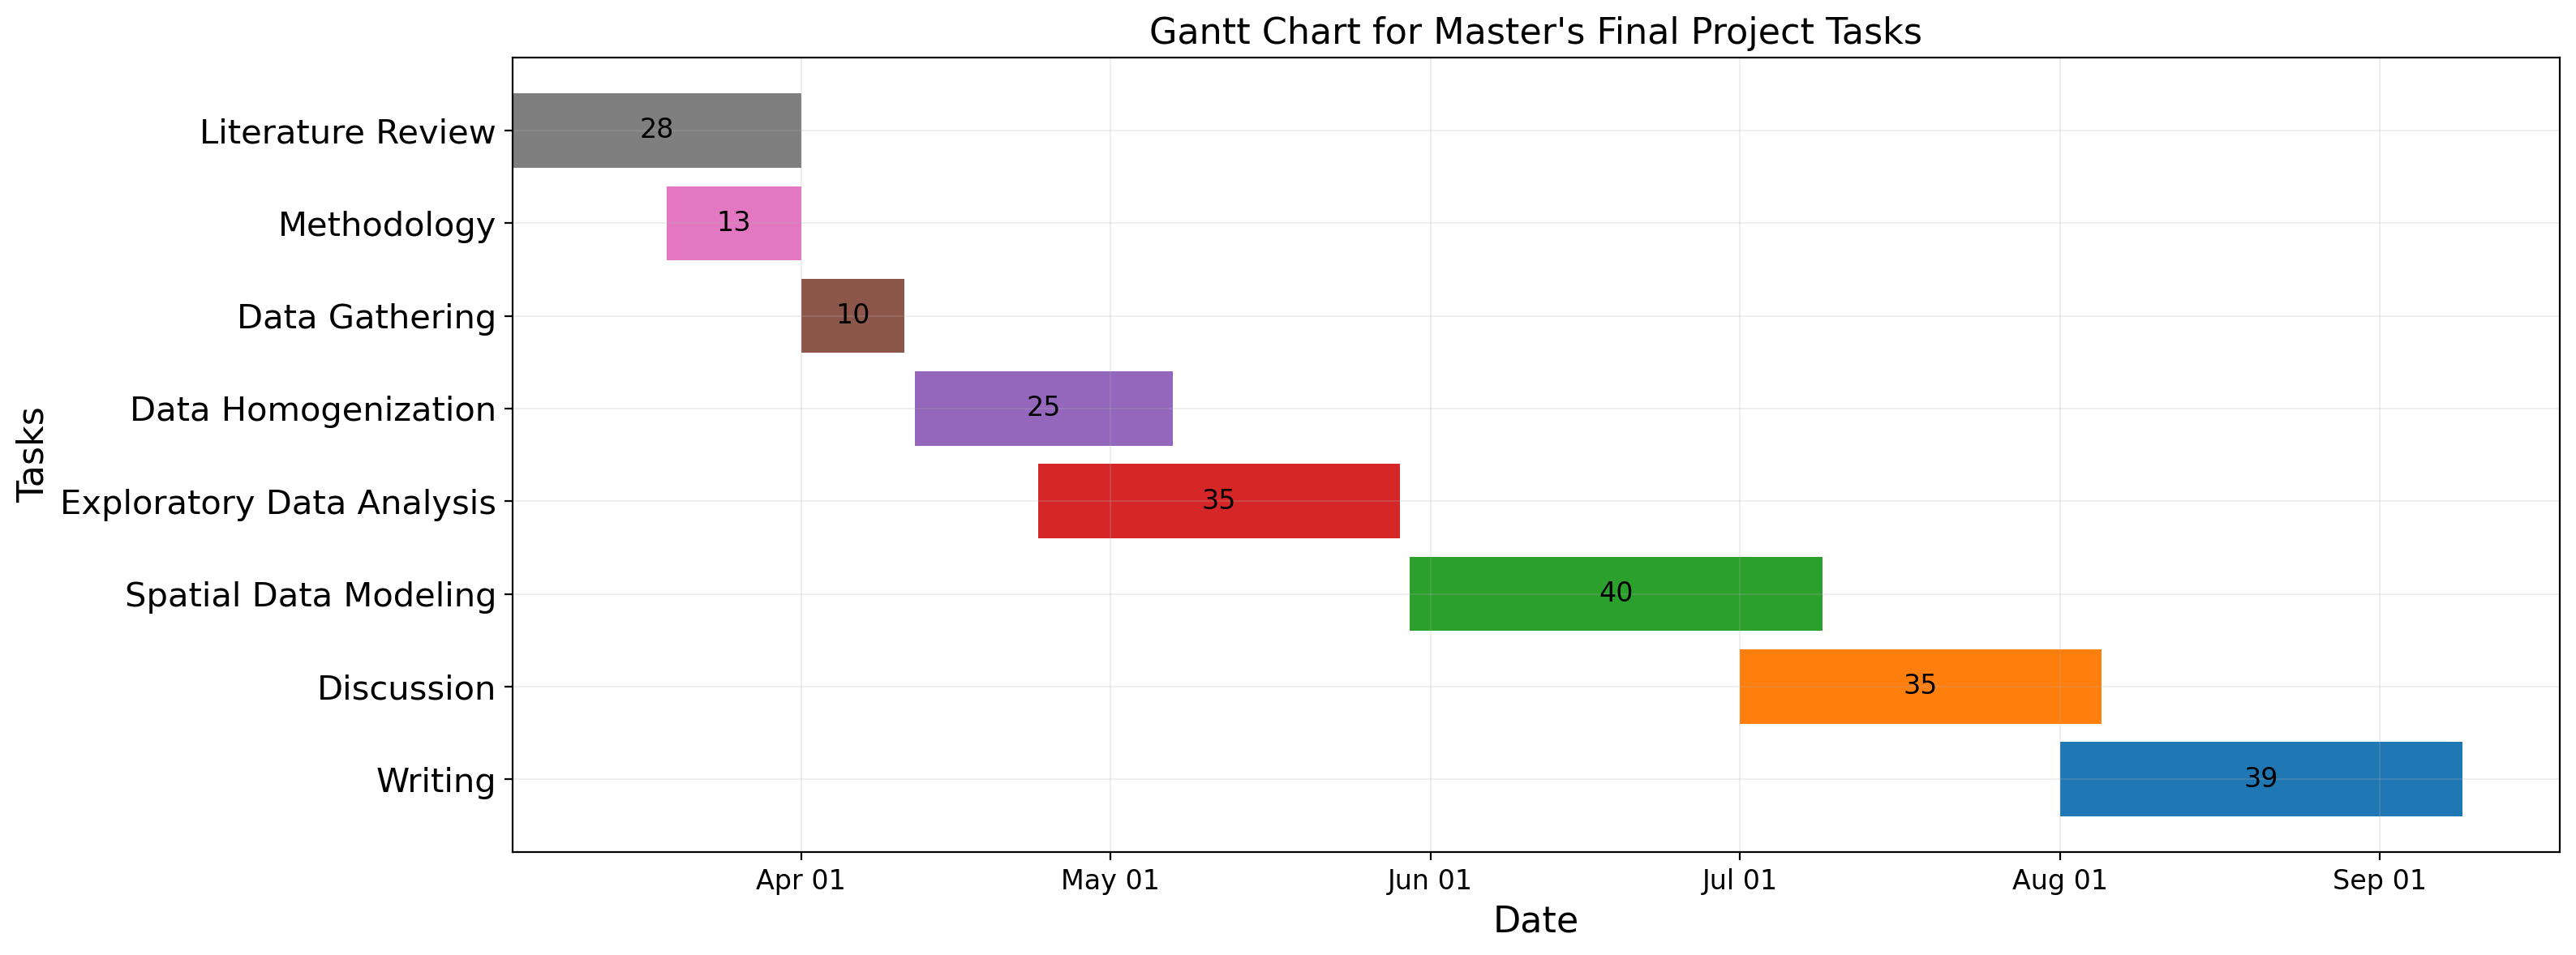

In [20]:
# Create figure and plot
fig, ax = plt.subplots(figsize=(16, 6))

# Iterate through the tasks and create a bar for each
for i, task in df.iterrows():
    duration = (task['End'] - task['Start']).days  # Calculate the duration in days
    ax.barh(task['Task'], duration, left=task['Start'], align='center')
    
    # Calculate the midpoint of the bar to position the text above it
    midpoint = task['Start'] + (task['End'] - task['Start']) / 2
    
    # Add the text for the number of days at the midpoint of the bar
    ax.text(midpoint, i, f'{duration}', va='center', ha='center', color='black', fontsize=12)

# Set the x-axis to be dates
ax.xaxis_date()

# Date format for the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate date labels for better readability
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tasks', fontsize=16)
plt.title("Gantt Chart for Master's Final Project Tasks", fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

# Show grid
ax.grid(True, linewidth=0.15)

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
plt.savefig(DIR_RESULTS / "gantchart", format="svg")

<Figure size 640x480 with 0 Axes>